## 1 - Importar  o banco de Daos 

In [3]:
# Importando biblioteca 
import pandas as pd

In [4]:
# Informar o arquivo usado
arquivo = 'heart.csv'

# Cria o DataFrame
dados = pd.read_csv(arquivo)

# Mostra o conjunto de dados
dados

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## 2 - Renomear as Colunas

In [5]:
# Para renomear as colunas do DataFrame, é necessário armazenar esse "novo" DataFrame em uma variável
# Além disso, dentro da função deve-se passar para o parêmetro "columns" um dicionário, onde as chaves são os
# nomes das colunas do DataFrame e os valores os novos nomes
trocar_nomes = {
    'Age': 'Idade', 
    'Sex': 'Sexo', 
    'ChestPainType': 'Tipo de dor', 
    'RestingBP': 'Pressão',
    'Cholesterol': 'Colesterol', 
    'FastingBS': 'Glicemia', 
    'RestingECG': 'Eletro', 
    'MaxHR': 'BPM',
    'ExerciseAngina': 'Dor por exec.', 
    'ST_Slope': 'Incl. ST', 
    'HeartDisease': 'DCV'
}

# Realizar a troca dos nomes das colunas
dados = dados.rename(columns=trocar_nomes)

# Mostrar o conjunto de dados
dados

,Idade,Sexo,Tipo de dor,Pressão,Colesterol,Glicemia,Eletro,BPM,Dor por exec.,Oldpeak,Incl. ST,DCV
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Idade          918 non-null    int64  
 1   Sexo           918 non-null    object 
 2   Tipo de dor    918 non-null    object 
 3   Pressão        918 non-null    int64  
 4   Colesterol     918 non-null    int64  
 5   Glicemia       918 non-null    int64  
 6   Eletro         918 non-null    object 
 7   BPM            918 non-null    int64  
 8   Dor por exec.  918 non-null    object 
 9   Oldpeak        918 non-null    float64
 10  Incl. ST       918 non-null    object 
 11  DCV            918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## 3 - Tratamneto de Dados 

In [7]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Pressão,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Colesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
Glicemia,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
BPM,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
DCV,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
# Excluir as linhas que possuem o valor de colesterol igual a 0
dados = dados[dados['Colesterol'] != 0]

# Excluir as linhas que possuem o valor de pressão arterial igual a 0
dados = dados[dados['Pressão'] != 0]

In [9]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
Pressão,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
Colesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
Glicemia,746.0,0.167560,0.373726,0.0,0.00,0.0,0.0,1.0
BPM,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
Oldpeak,746.0,0.901609,1.072861,-0.1,0.00,0.5,1.5,6.2
DCV,746.0,0.477212,0.499816,0.0,0.00,0.0,1.0,1.0


In [10]:
# Criar uma lista com as colunas que serão avaliadas
colunas = ['Sexo', 'Tipo de dor', 'Glicemia', 'Eletro', 'Dor por exec.', 'Incl. ST', 'DCV']

# Mostrar os valores únicos de cada coluna
for coluna in colunas:
    print(f'{coluna}: {dados[coluna].unique()}')

Sexo: ['M' 'F']
Tipo de dor: ['ATA' 'NAP' 'ASY' 'TA']
Glicemia: [0 1]
Eletro: ['Normal' 'ST' 'LVH']
Dor por exec.: ['N' 'Y']
Incl. ST: ['Up' 'Flat' 'Down']
DCV: [0 1]


## 4 - Análise de Dados 

In [11]:
# importando funções.
import numpy as np
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [12]:
sns.set_theme()
style.use('fivethirtyeight')

In [13]:
# Definir as cores que serão usadas nos gráficos
cores = ['lightcoral', 'deepskyblue', 'orchid', 'tomato', 'teal', 'darkcyan', 'limegreen', 'darkorange']

In [14]:
# Definir a função do gráfico de pizza
def grafico_pizza(data_frame, coluna, cores, explode, titulo, fonte):
    # Fazer contagem dos valores da coluna selecionada
    df = data_frame[coluna].value_counts()
    
    # Determinar o tamannho da plotagem
    plt.figure(figsize=(15, 10))
    
    # Criar o gráfico de pizza
    _, _, pacotes = plt.pie(df,
                            colors=cores,
                            labels=df.index,
                            explode=explode,
                            shadow=True,
                            startangle=90,
                            autopct='%1.1f%%',
                            textprops={'fontsize': fonte,
                                      'color': 'black',
                                      'weight': 'bold',
                                      'family': 'serif'})
    
    # Plotar o gráfico de pizza
    plt.setp(pacotes, color='white')
    
    # Colocar o título do gráfico
    plt.title(titulo, size=45)
    
    # Desenhar o círculo interno
    circulo_centro = plt.Circle((0, 0), 0.40, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(circulo_centro)

In [15]:
# Definir o gráfico da função de distribuição
def grafico_distribuicao(data_frame, coluna, titulo):
    # Armazenar os dados da coluna
    dados = data_frame[coluna]
    
    # Determinar a figura e seu tamanho
    fig = plt.figure(figsize=(17, 7))
    
    # Criar a grade em que os gráficos serão plotados
    grade = GridSpec(nrows=2, ncols=1, figure=fig)
    
    # Escolher uma das cores para o gráfico
    cor = np.random.choice(cores, 1)[0]
    
    # Motrar o valor de assimetria dos dados
    print(f'Assimetria de {titulo}: {np.round(dados.skew(), 3)}')
    
    # Plotar o histograma
    ax0 = fig.add_subplot(grade[0, :])
    ax0.set_title(f'Histograma e BoxPlot de {titulo}', y=1.05)
    sns.histplot(data=dados, ax=ax0, color=cor)
    
    # Plotar o BoxPlot
    ax1 = fig.add_subplot(grade[1, :])
    plt.axis('off')
    sns.boxplot(x=dados, ax=ax1, color=cor)

In [16]:
# Definir o gráfico de influência
def grafico_influencia(data_frame, coluna, bins, labels, com_bins=True):
    # Armazenar os dados da coluna
    influencia = data_frame.loc[:, [coluna, 'DCV']]
    
    # Se os dados de "coluna" não forem como classe, então terá intervalos ("bins" e "labels")
    if com_bins:
        influencia[coluna] = pd.cut(influencia[coluna],
                                   bins=bins,
                                   labels=labels)
        
    # Escolher uma das cores para o gráfico
    cor = np.random.choice(cores, 1)[0]
    
    # Determinar o tamanho da figura
    plt.figure(figsize=(15, 5))
    
    # Criar o gráfico

    # Simplificar a chamada da função pointplot:                           Removidos da finção: "dodge=0.1, capsize=.1,"
    grafico = sns.pointplot(x=coluna, y='DCV', data=influencia, color=cor)
    
    # Colocar o título do gráfico
    grafico.set_title(f'{coluna} influência', fontsize=25)

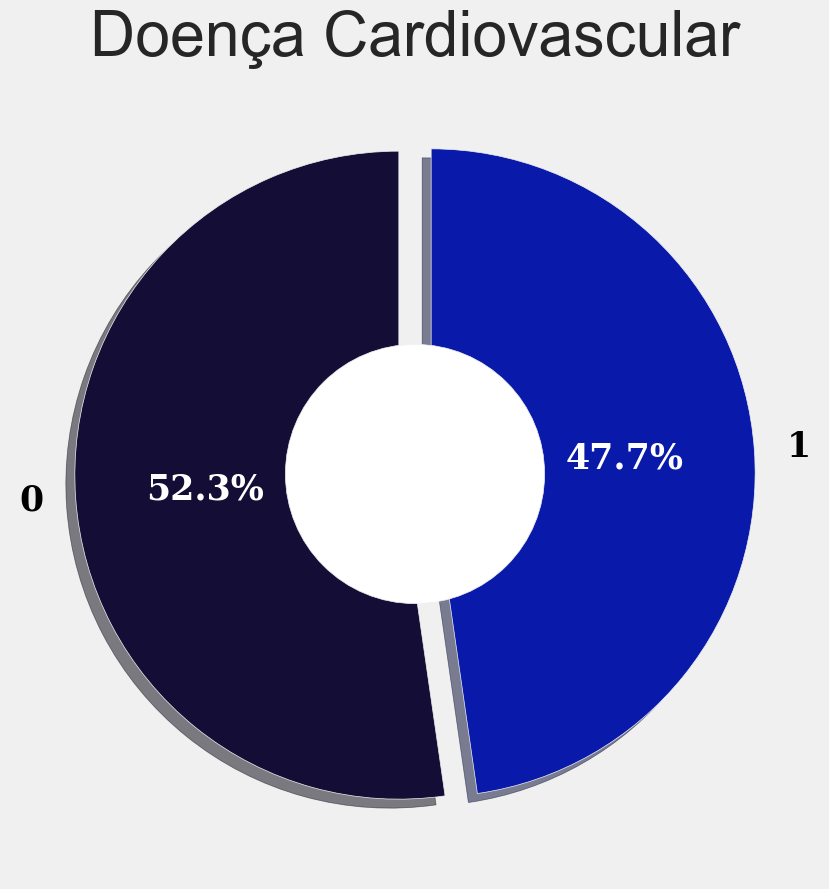

In [17]:
# Chamar a função com a variável 'dados'
grafico_pizza(dados, 'DCV', ('#140E36', '#091AAB'), (0.05, 0.05), 'Doença Cardiovascular', 25)

In [18]:
'''
Conclusão: O número de observações dos pacientes que não possuem alguma doença cardiovascular 
é cerca de 5% maior do que os pacientes que apresentam essa enfermidade.
'''

'\nConclusão: O número de observações dos pacientes que não possuem alguma doença cardiovascular \né cerca de 5% maior do que os pacientes que apresentam essa enfermidade.\n'

Assimetria de Idade: -0.103


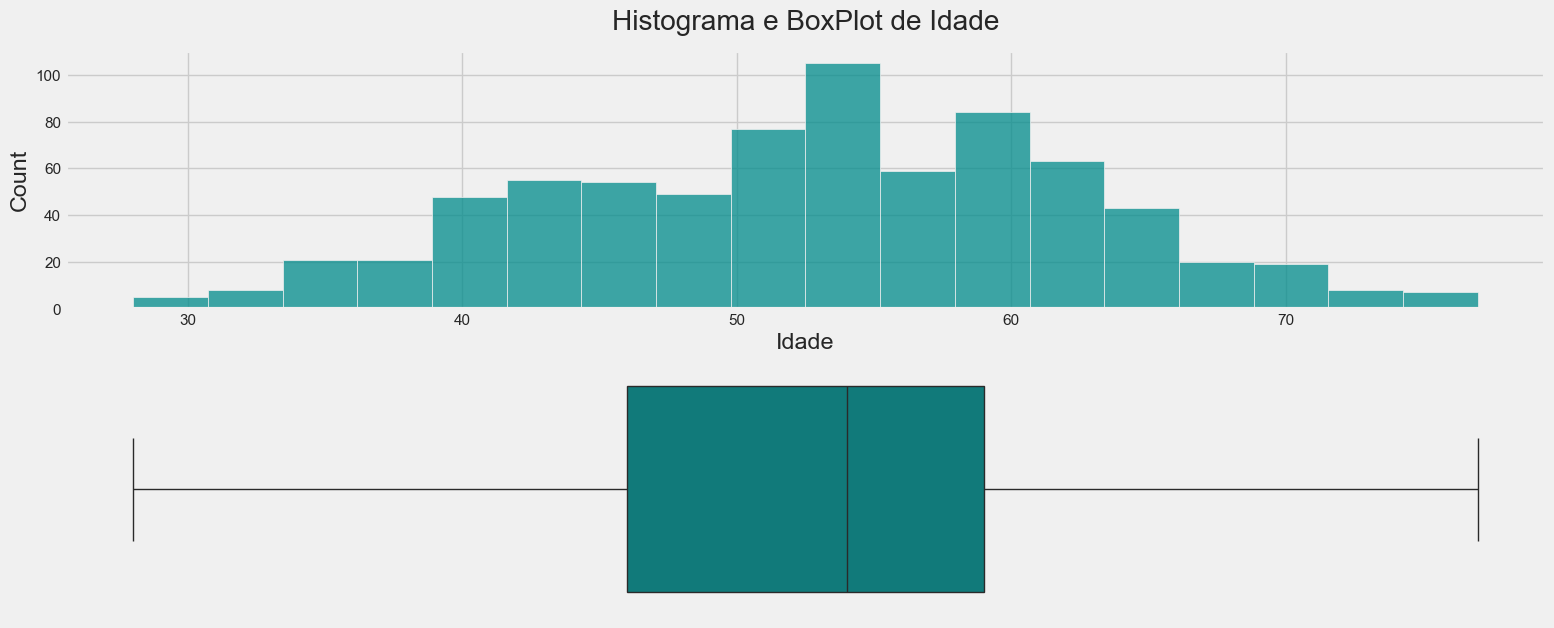

In [19]:
grafico_distribuicao(dados, 'Idade', 'Idade')

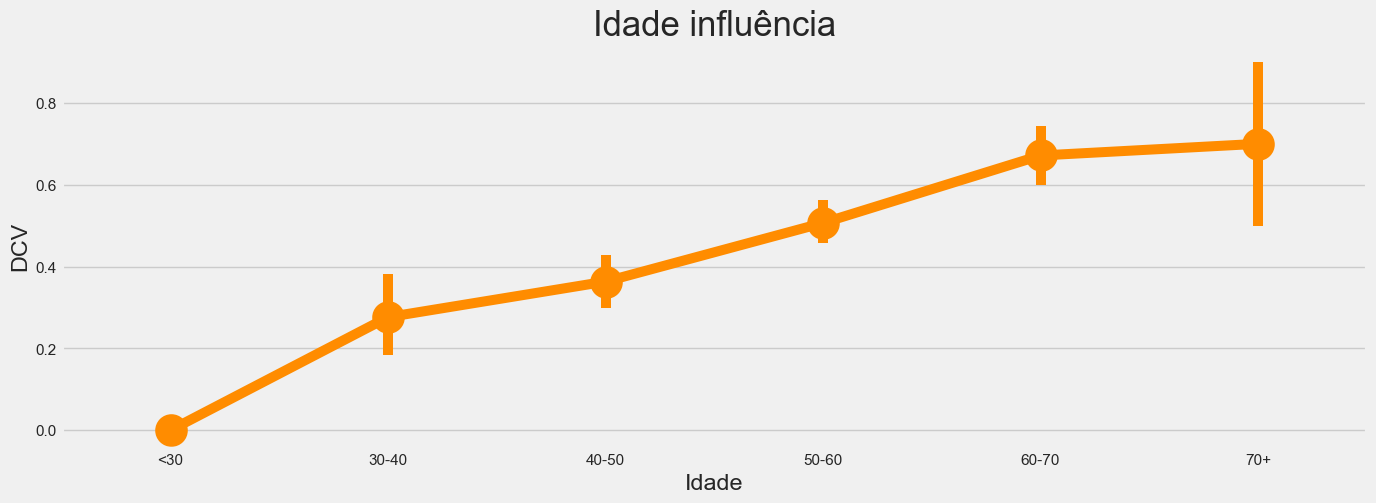

In [20]:
grafico_influencia(dados, 'Idade', [0, 30, 40, 50, 60, 70, 100], ['<30', '30-40', '40-50', '50-60', '60-70', '70+'])

In [21]:
'''
Conclusão: Podemos ver a tendência (uma relação linear): com o aumento da idade dos pacientes, 
o risco de desenvolver alguma doença cardiovascular aumenta. Essa classe de enfermidade tem mais 
chances de afetar as pessoas a partir de 40 anos.
'''

'\nConclusão: Podemos ver a tendência (uma relação linear): com o aumento da idade dos pacientes, \no risco de desenvolver alguma doença cardiovascular aumenta. Essa classe de enfermidade tem mais \nchances de afetar as pessoas a partir de 40 anos.\n'

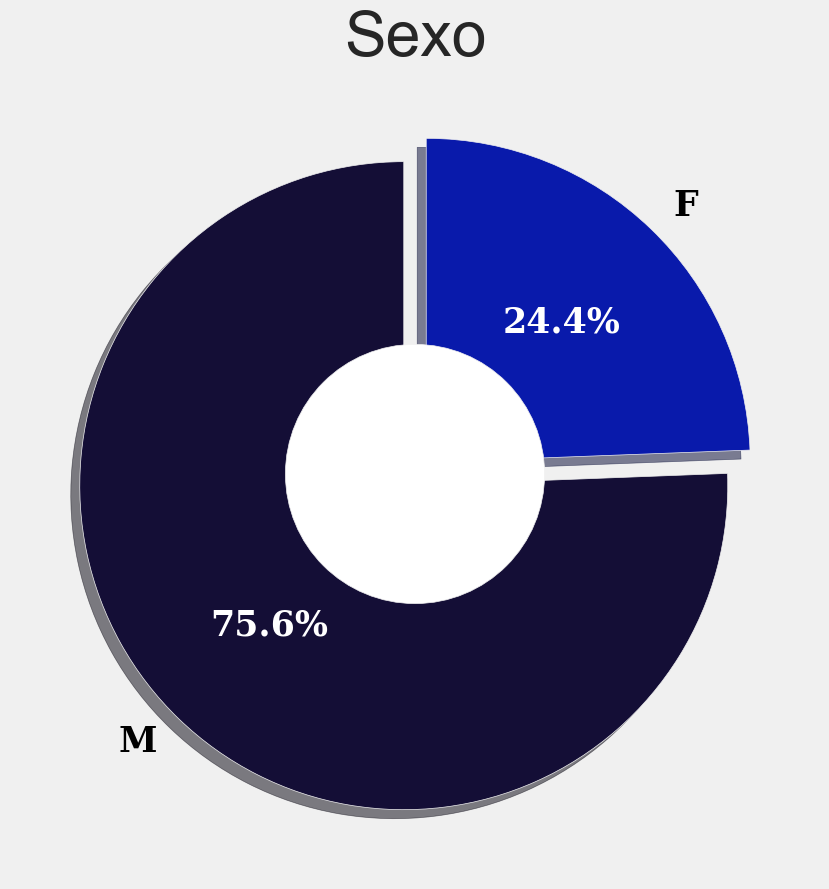

In [22]:
grafico_pizza(dados, 'Sexo', ('#140E36', '#091AAB'), (0.05, 0.05),'Sexo', 25)

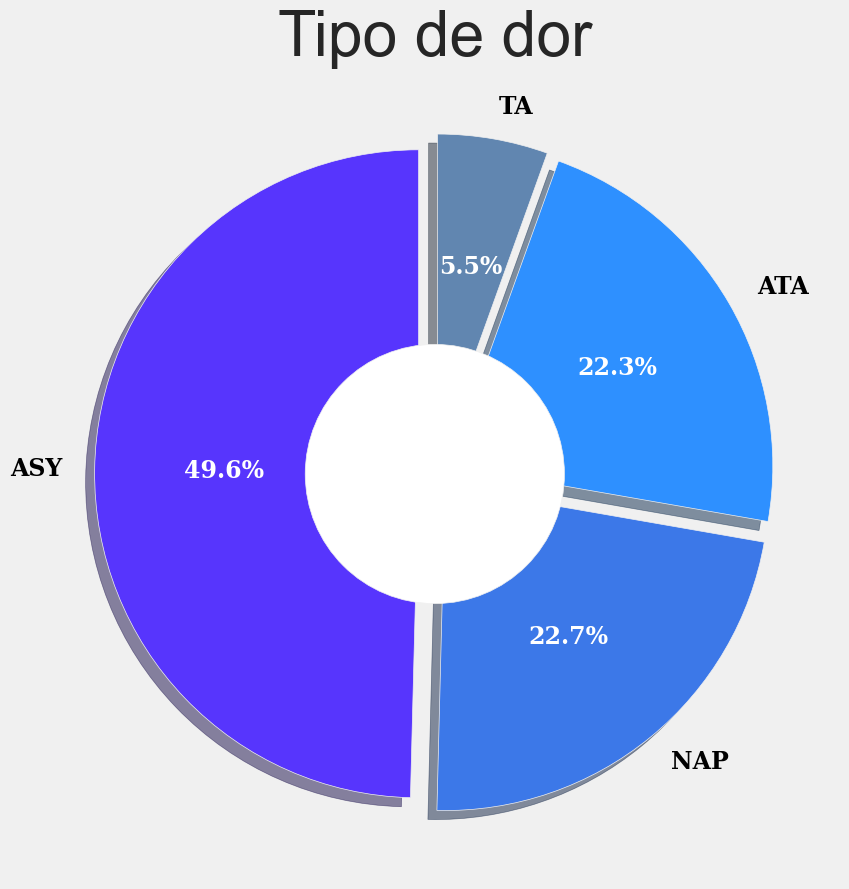

In [23]:
grafico_pizza(dados, 'Tipo de dor', ('#5735FD', '#3C78E8', '#2E90FF', '#6186b0'),
              (0.05, 0.05, 0.05, 0.05), 'Tipo de dor', 17)

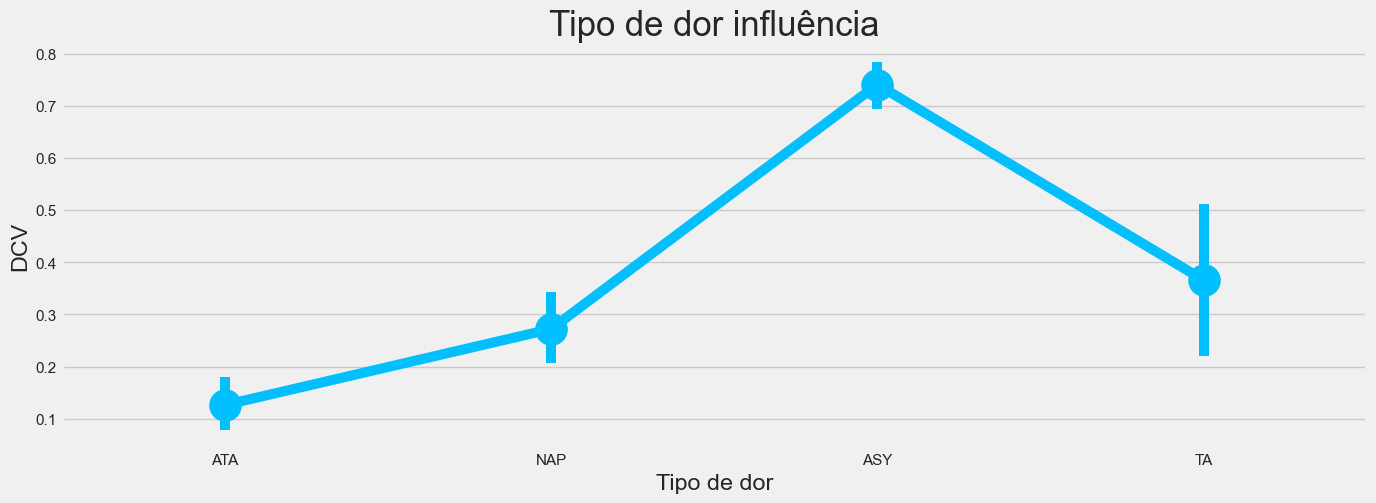

In [24]:
grafico_influencia(dados, 'Tipo de dor', None, None, False)

In [25]:
'''
Conclusão: O caso dos pacientes que são assintomáticos, possui uma forte influência na 
progressão da enfermidade, enquanto uma angina atípica tem menos casos (em média).
'''

'\nConclusão: O caso dos pacientes que são assintomáticos, possui uma forte influência na \nprogressão da enfermidade, enquanto uma angina atípica tem menos casos (em média).\n'

Assimetria de Pressão arterial: 0.62


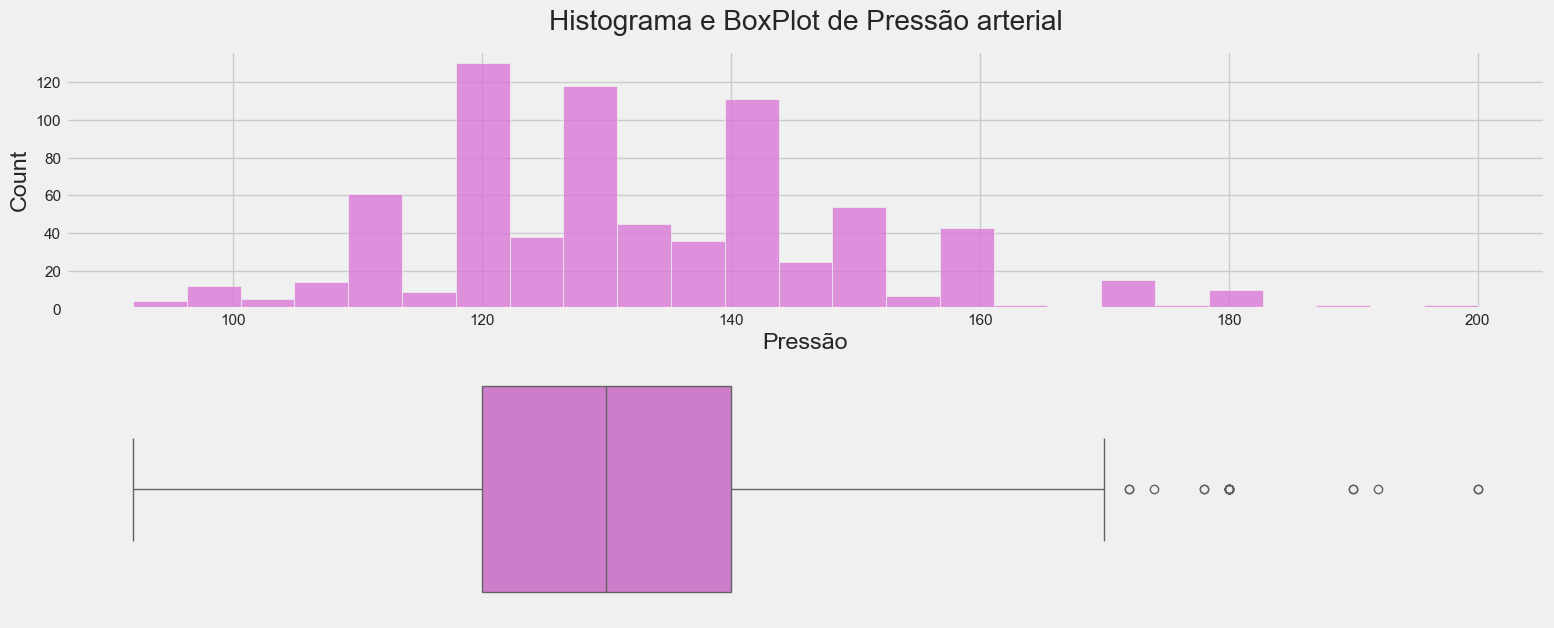

In [26]:
grafico_distribuicao(dados, 'Pressão', 'Pressão arterial')

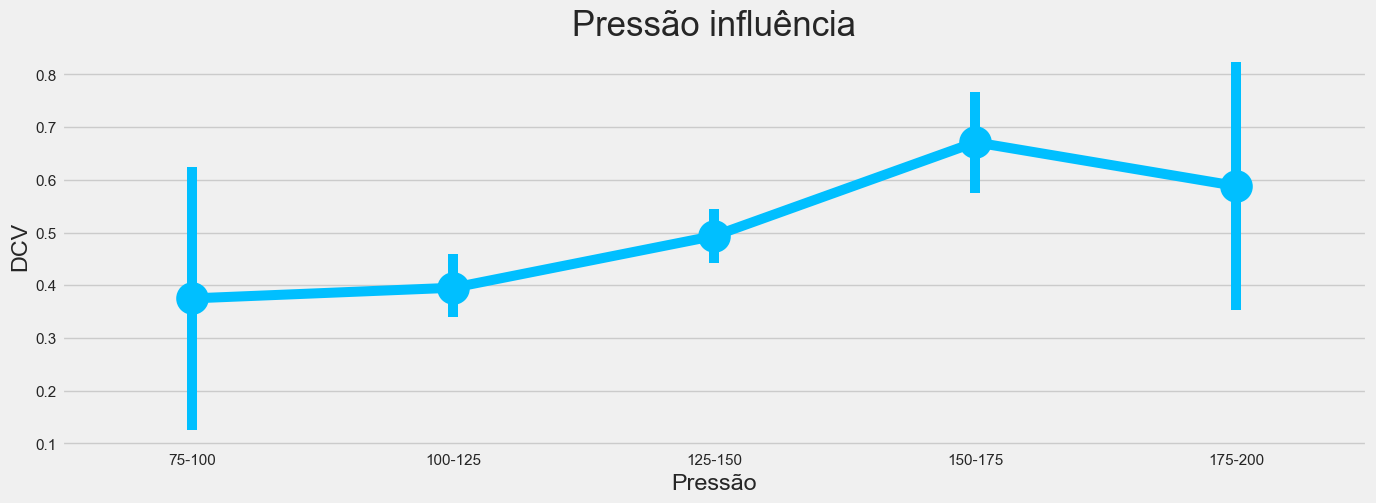

In [27]:
grafico_influencia(dados, 'Pressão', [75, 100, 125, 150, 175, 200], ['75-100', '100-125', '125-150', '150-175', '175-200'])

In [28]:
'''
Conclusão: Pacientes com pressão baixa (<=100 mmHg) e pressão alta (>=150 mmHg) 
tem mais chances de desenvolver algum tipo de doença cardiovascular.
'''

'\nConclusão: Pacientes com pressão baixa (<=100 mmHg) e pressão alta (>=150 mmHg) \ntem mais chances de desenvolver algum tipo de doença cardiovascular.\n'

Assimetria de Colesterol: 1.239


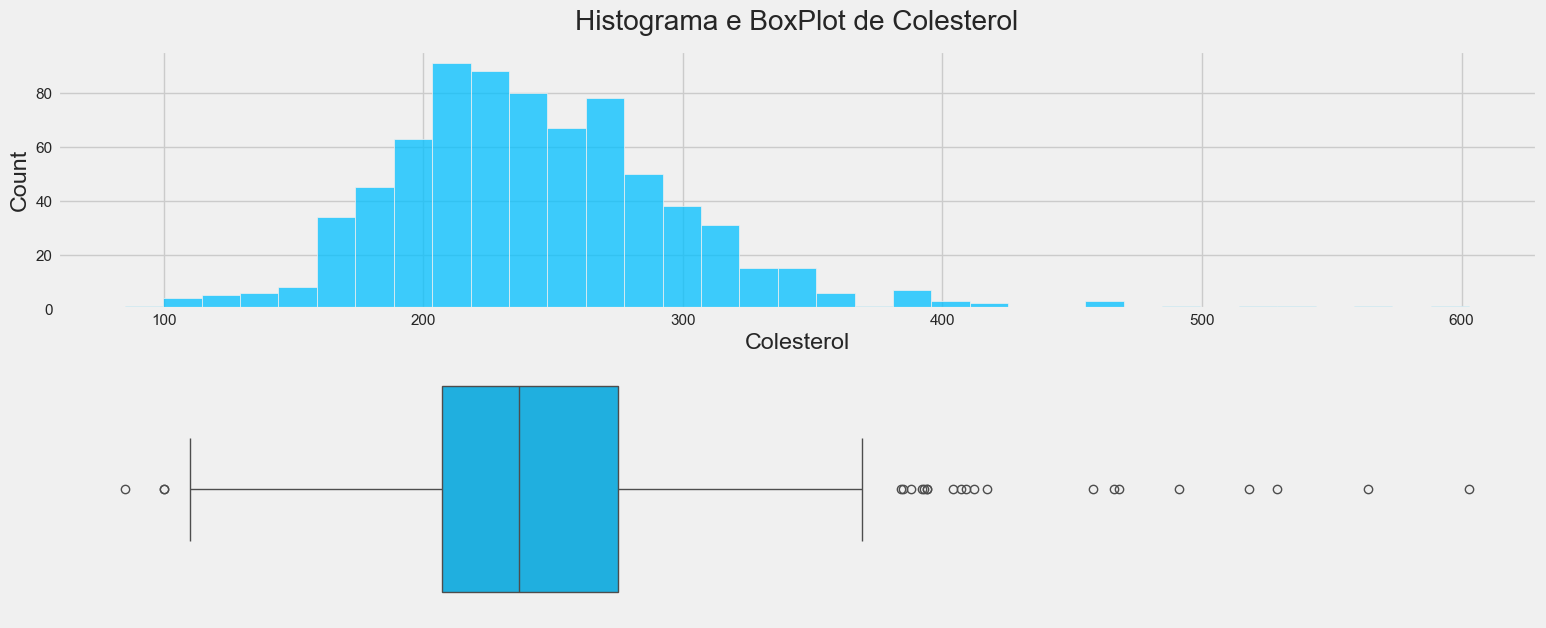

In [29]:
grafico_distribuicao(dados, 'Colesterol', 'Colesterol')

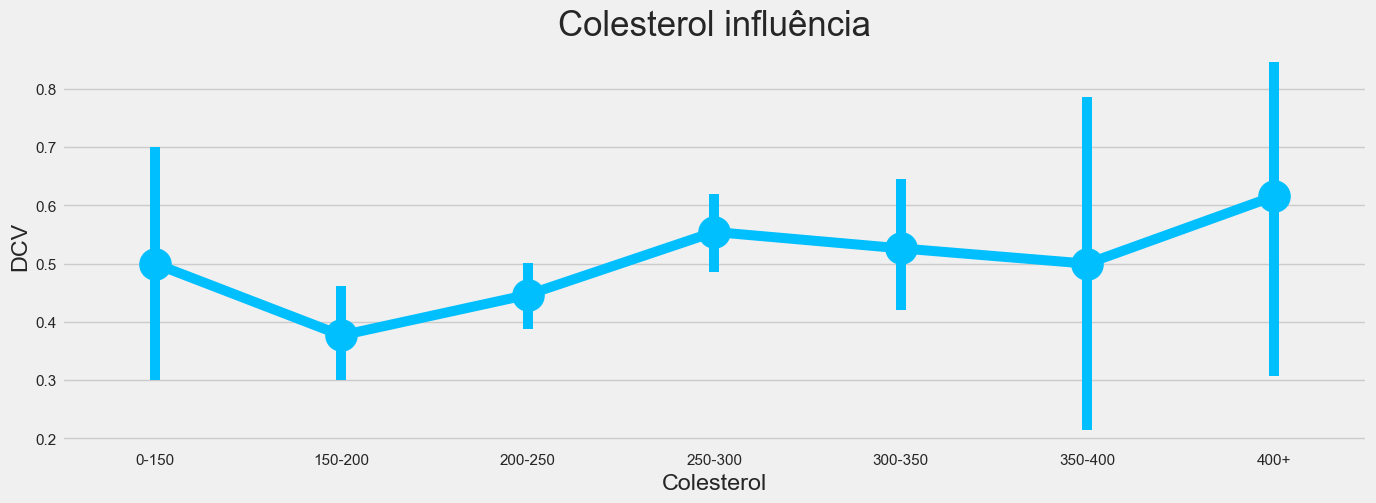

In [30]:
grafico_influencia(dados, 'Colesterol',[0, 150, 200, 250, 300, 350, 400, 1000],
                   ['0-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400+'])

In [31]:
'''
Conclusão: Pacientes com colesterol baixo (<=150 mm/dL) e colesterol alto (>=300 mm/dL) 
possuem maiores chances de desenvolver algum tipo de doença cardiovascular.
'''

'\nConclusão: Pacientes com colesterol baixo (<=150 mm/dL) e colesterol alto (>=300 mm/dL) \npossuem maiores chances de desenvolver algum tipo de doença cardiovascular.\n'

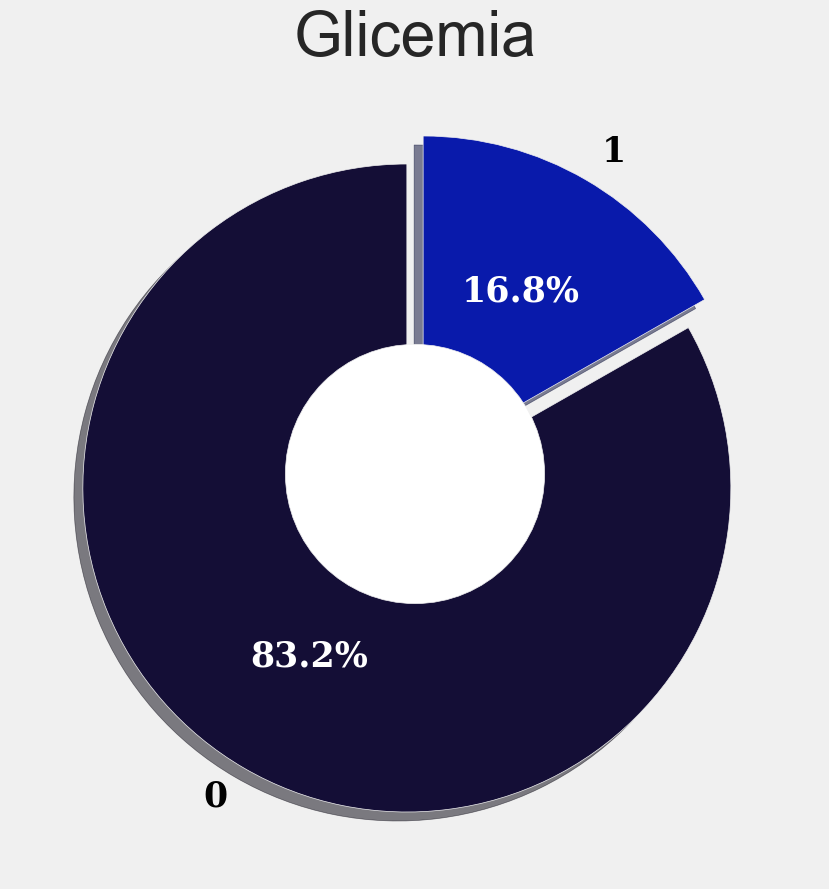

In [32]:
grafico_pizza(dados, 'Glicemia', ('#140E36', '#091AAB'), (0.05, 0.05), 'Glicemia', 25)

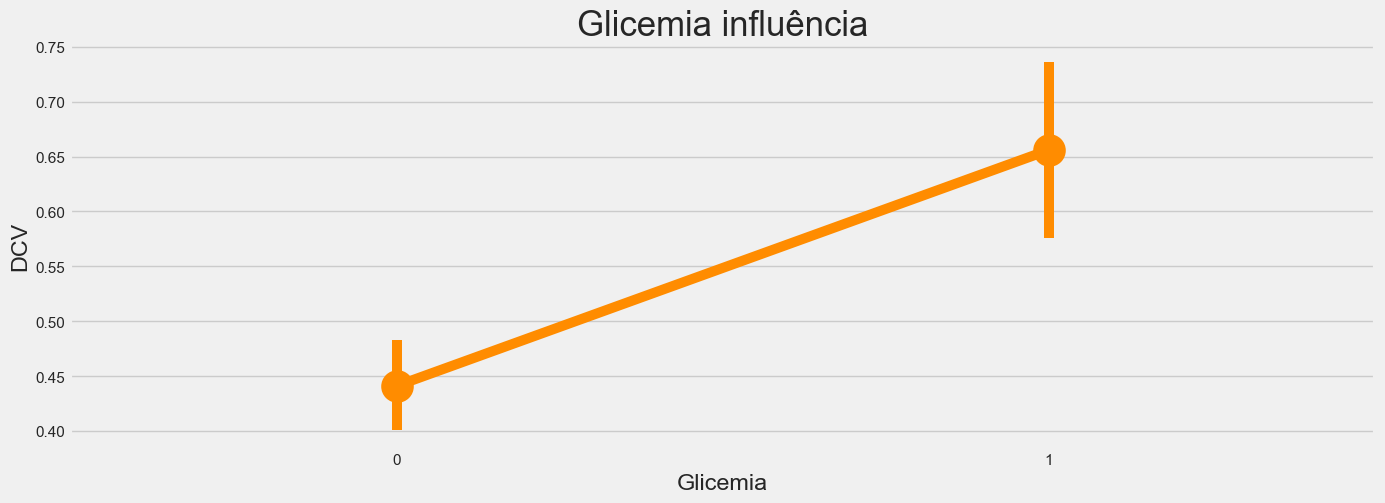

In [33]:
grafico_influencia(dados, 'Glicemia', None, None, False)

In [34]:
'''
Conclusão: Pacientes com glicemia maior que 120 mg/dL têm mais chances de desenvolver alguma doença cardiovascular. 
Já as pessoas que possem a glicemia menor do que 120 mg/dL possuem menos chances de desenvolver alguma DCV.
'''

'\nConclusão: Pacientes com glicemia maior que 120 mg/dL têm mais chances de desenvolver alguma doença cardiovascular. \nJá as pessoas que possem a glicemia menor do que 120 mg/dL possuem menos chances de desenvolver alguma DCV.\n'

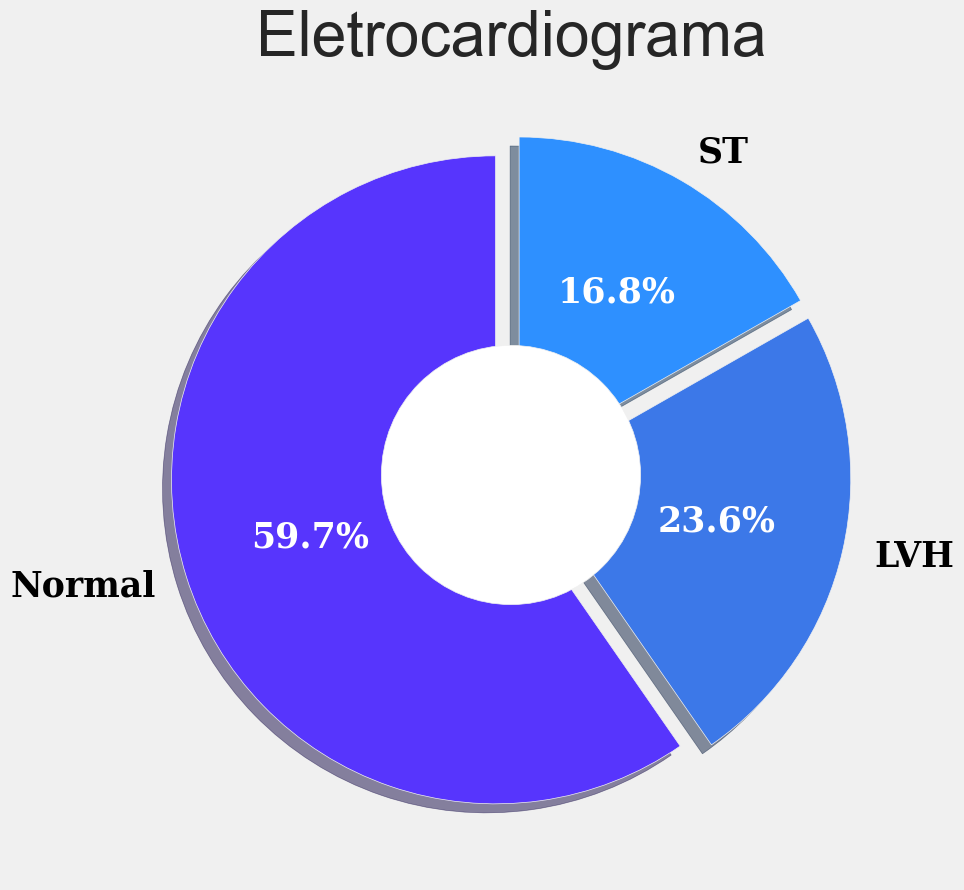

In [35]:
grafico_pizza(dados, 'Eletro', ('#5735FD', '#3C78E8', '#2E90FF'), (0.05, 0.05, 0.05), 'Eletrocardiograma', 25)

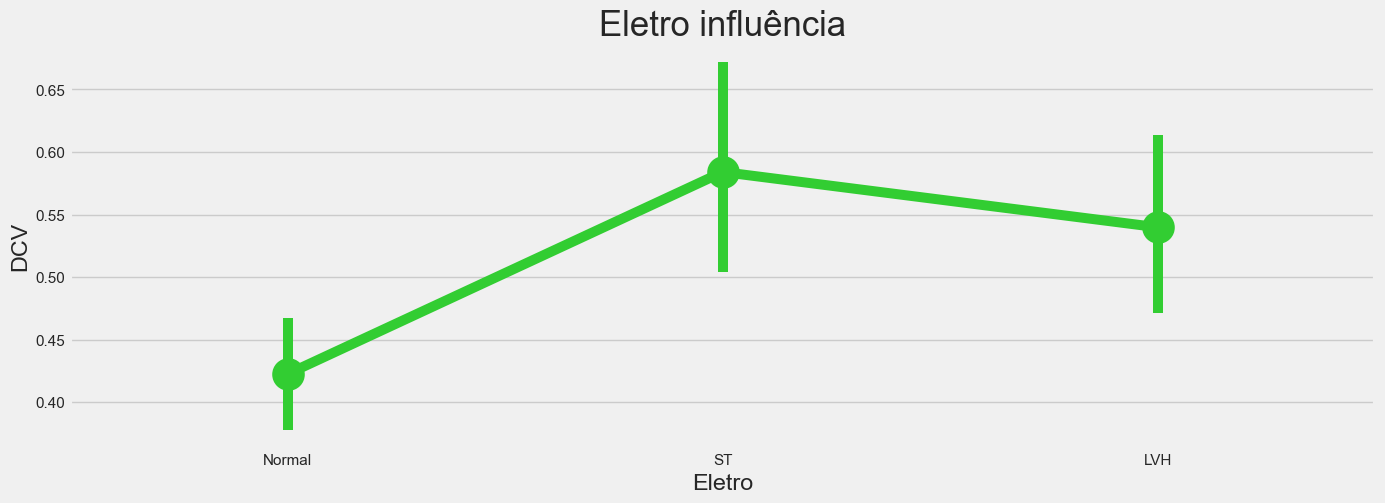

In [36]:
grafico_influencia(dados, 'Eletro', None, None, False)

In [37]:
'''
Conclusão: Há maiores chaves de desenvolver alguma doença cardiovascular em pacientes com o segmento ST anormal 
ou com hipertrofia no ventrículo esquerdo (segundo o critério de Este).
'''

'\nConclusão: Há maiores chaves de desenvolver alguma doença cardiovascular em pacientes com o segmento ST anormal \nou com hipertrofia no ventrículo esquerdo (segundo o critério de Este).\n'

Assimetria de Batimento Cardíaco Máximo: -0.165


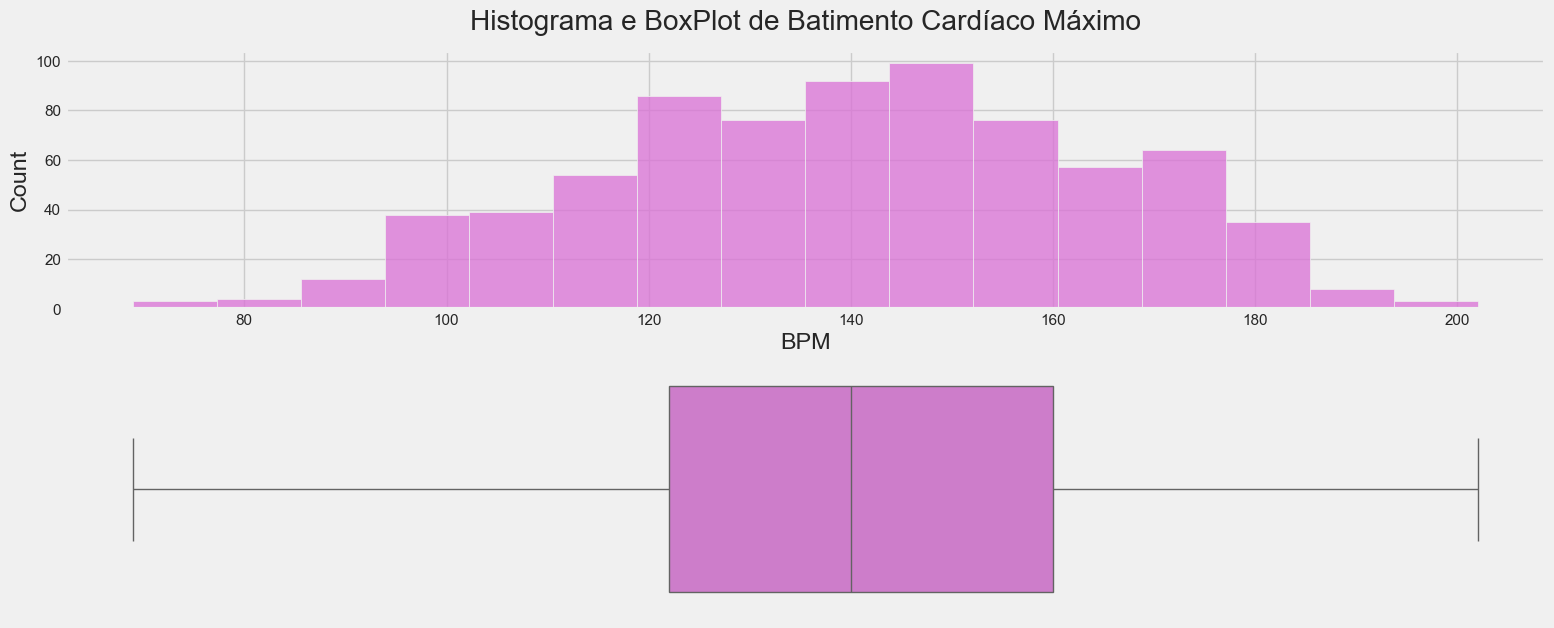

In [38]:
grafico_distribuicao(dados, 'BPM', 'Batimento Cardíaco Máximo')

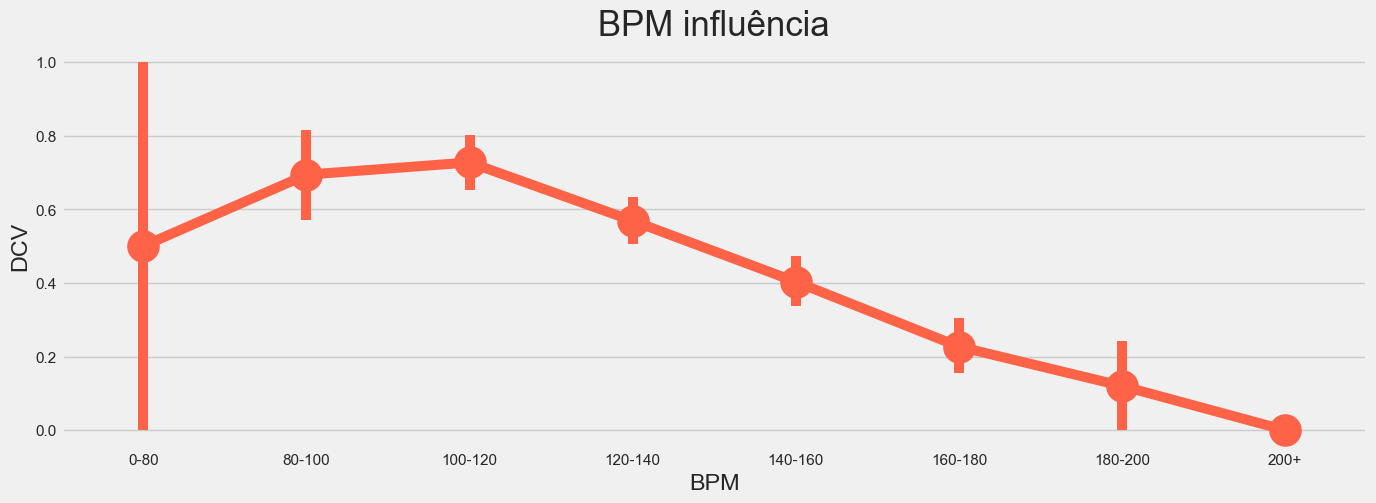

In [39]:
grafico_influencia(dados, 'BPM', [0, 80, 100, 120, 140, 160, 180, 200, 1000],
                   ['0-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200', '200+'])

In [40]:
'''
Conclusão: Como o batimento cardíado máximo é determinado pelo valor fixo de 220 menos a idade do paciente, 
podemos ver que há uma chance maior de pacientes com batimento cardíaco máximo com valor <=120 BPM, uma vez 
que quanto mais idosa for a pessoa, menor o valor máximo do batimento cardíaco, consequentemente, aumentando 
as chances de uma doença cardiovascular.
'''

'\nConclusão: Como o batimento cardíado máximo é determinado pelo valor fixo de 220 menos a idade do paciente, \npodemos ver que há uma chance maior de pacientes com batimento cardíaco máximo com valor <=120 BPM, uma vez \nque quanto mais idosa for a pessoa, menor o valor máximo do batimento cardíaco, consequentemente, aumentando \nas chances de uma doença cardiovascular.\n'

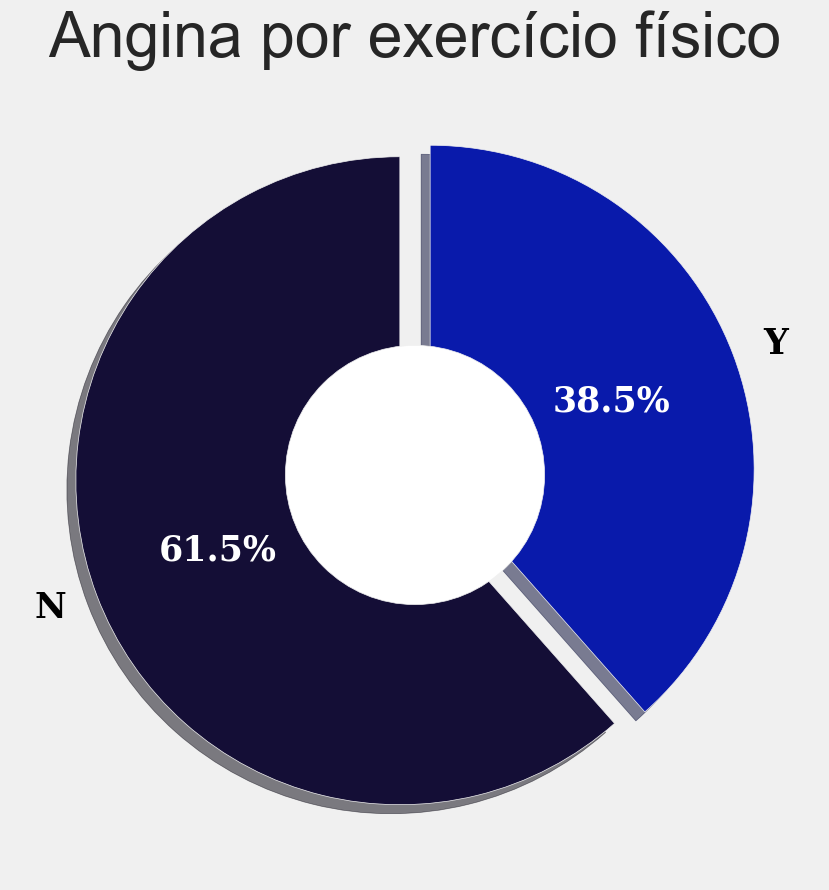

In [41]:
grafico_pizza(dados, 'Dor por exec.', ('#140E36', '#091AAB'), (0.05, 0.05), 'Angina por exercício físico', 25)

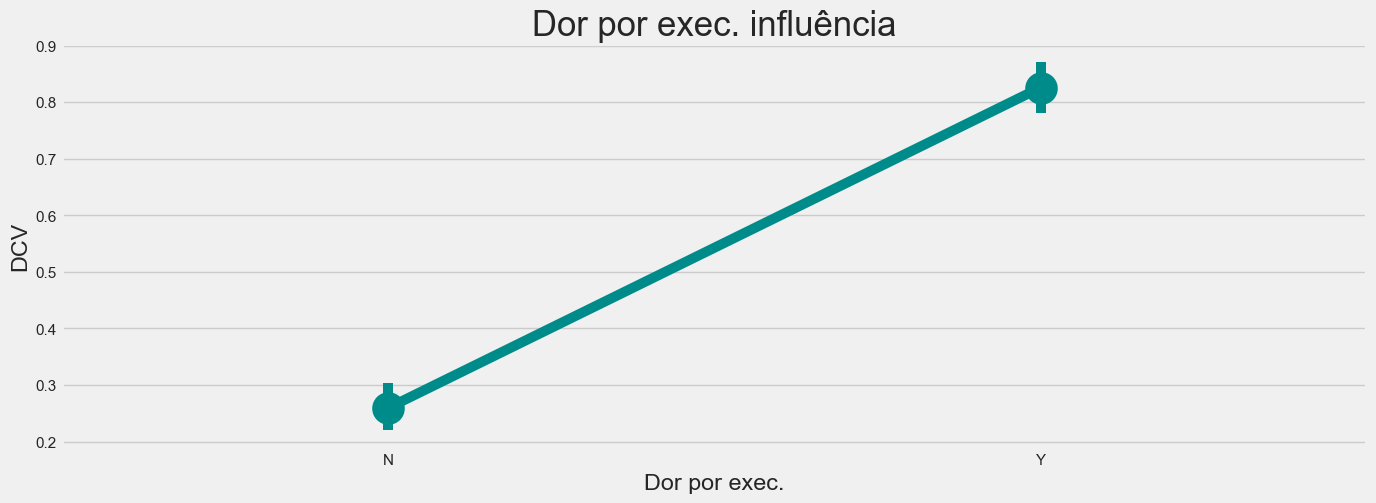

In [42]:
grafico_influencia(dados, 'Dor por exec.', None, None, False)

In [43]:
'''
Conclusão: Paciente que reportam angina após atividade física possuem mais chances de densenvolver alguma DCV.
'''

'\nConclusão: Paciente que reportam angina após atividade física possuem mais chances de densenvolver alguma DCV.\n'

Assimetria de Oldpeak: 1.219


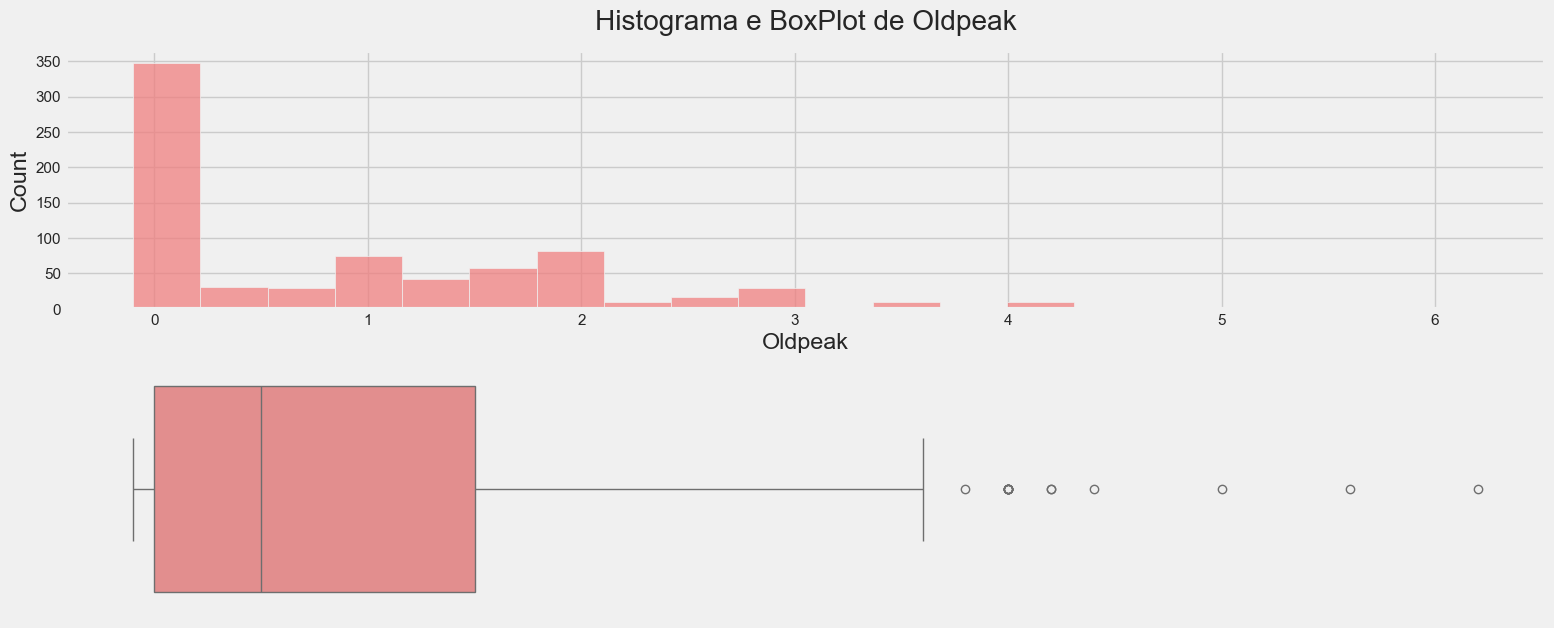

In [44]:
grafico_distribuicao(dados, 'Oldpeak', 'Oldpeak')

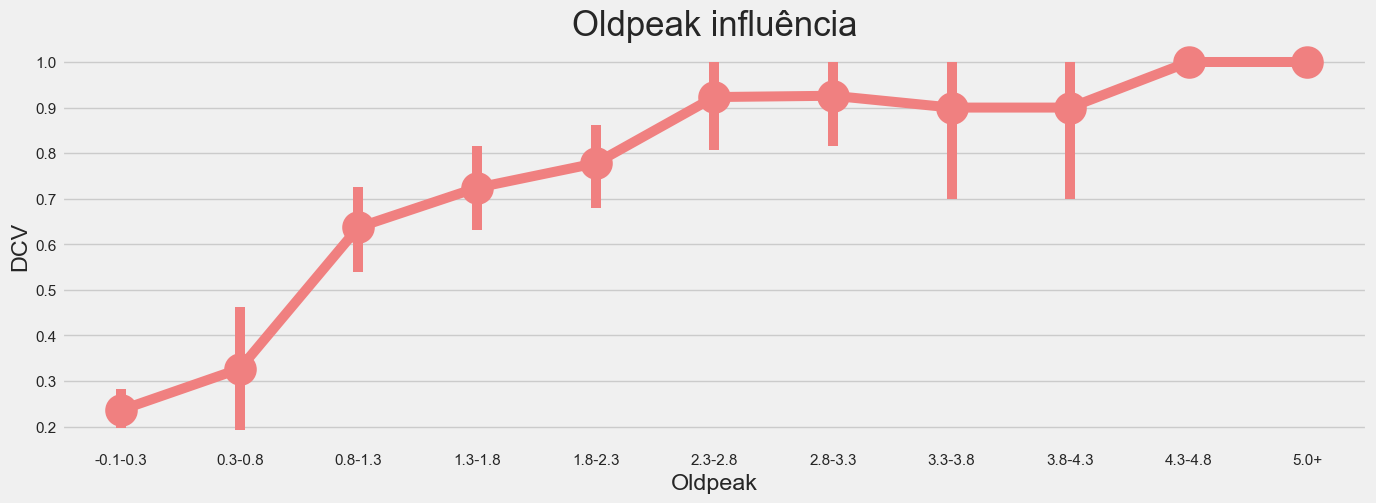

In [45]:
grafico_influencia(dados, 'Oldpeak', [-0.1, 0.3, 0.8, 1.3, 1.8, 2.3, 2.8, 3.3, 3.8, 4.3, 4.8, 7.0],
                   ['-0.1-0.3', '0.3-0.8', '0.8-1.3', '1.3-1.8', '1.8-2.3', '2.3-2.8', '2.8-3.3', '3.3-3.8', '3.8-4.3', '4.3-4.8', '5.0+'])

In [46]:
'''
Conclusão: Pacientes com o valor de Oldpeak maior que 0,8, têm mais chances de desenvolver 
alguma doença cardiovascula. Além disso, quanto maior o valor de Oldpeak, maiores as chances.
'''

'\nConclusão: Pacientes com o valor de Oldpeak maior que 0,8, têm mais chances de desenvolver \nalguma doença cardiovascula. Além disso, quanto maior o valor de Oldpeak, maiores as chances.\n'

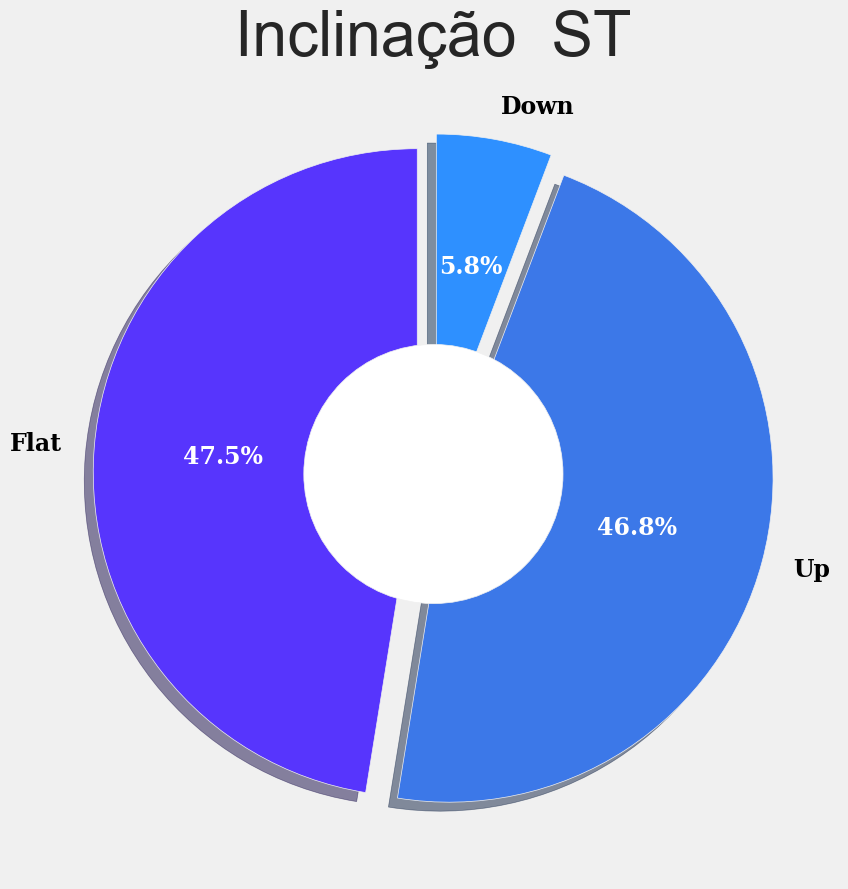

In [47]:
grafico_pizza(dados, 'Incl. ST', ('#5735FD', '#3C78E8', '#2E90FF'), (0.05, 0.05, 0.05), 'Inclinação  ST', 17)

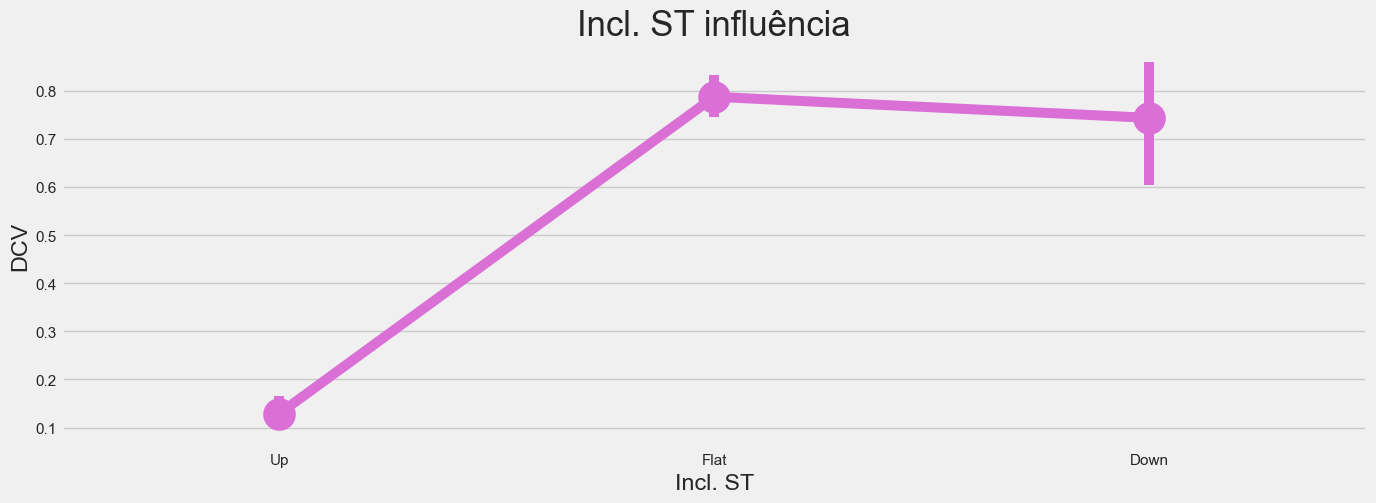

In [48]:
grafico_influencia(dados, 'Incl. ST', None, None, False)

In [49]:
'''
Conclusão: Podemos observar que os pacientes que possuem a inclinação do segmento ST 
como Flat ou Down, têm chances maiores de desenvolver alguma doença cardiovascular.
'''

'\nConclusão: Podemos observar que os pacientes que possuem a inclinação do segmento ST \ncomo Flat ou Down, têm chances maiores de desenvolver alguma doença cardiovascular.\n'

## 5 - Codificação  Dos  Dados 

In [73]:
 # fazer a instalação: pip install scikit-learn
from sklearn import preprocessing

In [74]:
# Criar uma lista para armazanar as colunas que possuem o dtype como object
colunas = [coluna for coluna in dados.columns if dados[coluna].dtype == 'object']

# Criar o codificador
codificador = preprocessing.LabelEncoder()

# Codificar cada coluna do conjunto de dados 
for coluna in colunas:
    dados[coluna] = codificador.fit_transform(dados[coluna])

In [75]:
dados

,Idade,Sexo,Tipo de dor,Pressão,Colesterol,Glicemia,Eletro,BPM,Dor por exec.,Oldpeak,Incl. ST,DCV
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


## 6 - Análise exploratória 

<function matplotlib.pyplot.show(close=None, block=None)>

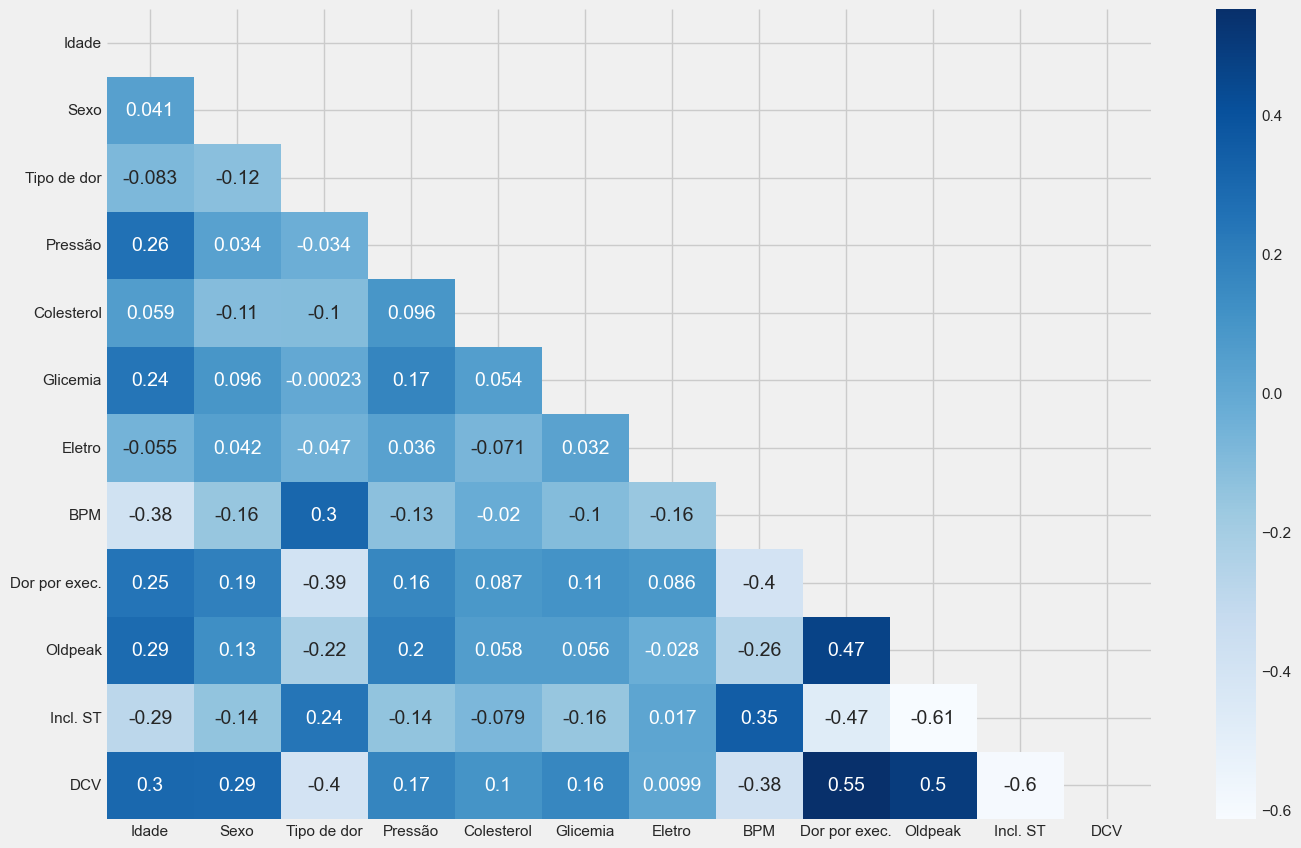

In [76]:
# Dimensões da plotagem 
plt.figure(figsize=(15, 10))

# Criar a máscara para mostrar somente a metade das correlações 
mascara = np.triu(dados.corr())

# Criar o heatmap (mapa de calor )
sns.heatmap(data=dados.corr(), cmap='Blues', mask=mascara, annot=True)

# MOstrar o heatmap
plt.show


## 7 - Modelagem do Aprendizado de Máquina (ou Inteligência Artificial)

In [77]:
# Separar os dados em dois grupos 

x = dados.drop(['DCV'], axis=1)
y = dados['DCV']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# Informar os arrays para a separação, nesse caso x & y
# Informar o tamanho so conjunto de treino, nesse caso é de 70% dos dados seerão para p treino da IA
# Informar o parâmetro "random_state" como ) para que seja sempre os mesmos dados a serem usados quando for 
# repreduzir novamente o treinamento  sa IA
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.7, random_state=0)

In [80]:
'''
Com os dados separados em treino e teste, vamos usar três algoritmos de Aprendizado de Máquina e ver qual deles é o melhor. São eles:

Random Forest Classifier;
kNN (K-Nearest Neighbours) e;
Gradient Boosting Classifier
Todos esses algoritmos estão presentes no módulo sklearn.
'''

'\nCom os dados separados em treino e teste, vamos usar três algoritmos de Aprendizado de Máquina e ver qual deles é o melhor. São eles:\n\nRandom Forest Classifier;\nkNN (K-Nearest Neighbours) e;\nGradient Boosting Classifier\nTodos esses algoritmos estão presentes no módulo sklearn.\n'

In [81]:
# Importar os modelos de Aprendizado de Máquina
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [82]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=500, max_depth=70, max_features=2, random_state=0)

# kNN
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', weights='uniform', n_jobs=-1)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=70,
                                 max_features=2, n_estimators=500, random_state=0)

In [83]:
'''
Com os algoritmos montados, basta treiná-los com o método fit(). Os parêmetros usados são o X_treino e y_treino.
'''

'\nCom os algoritmos montados, basta treiná-los com o método fit(). Os parêmetros usados são o X_treino e y_treino.\n'

In [84]:
# Treinar o Random Forest Classifier
rfc.fit(X_treino, y_treino)

RandomForestClassifier(max_depth=70, max_features=2, n_estimators=500,
                       n_jobs=-1, random_state=0)

In [85]:
# Treinar o kNN
knn.fit(X_treino, y_treino)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [ ]:
# Treinar o Gradient Boosting Classifier
gbc.fit(X_treino, y_treino)

In [ ]:
'''
Com os modelos treinados, vejamos como eles se saem com os dados de teste. 
Lembre-se que esses dados as IAs nunca viram. Vamos analisar a matriz de confusão de cada modelo. 
Essa matriz serve para observar a taxa de acertos e erros da IA. 
Para ver essa matriz, chame a função confusion_matrix do módulo sklearn.
'''

In [ ]:
# Importando as métricas do módulo sklearn

# Importar a matriz de confusão e as métricas de avaliação
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [65]:
# Para avaliar as métricas e a matriz de confusão, vamos criar uma função para facilitar a nossa vida
def metricas(X_teste, y_teste, classificador, nome_clf):
    # Prever o resultado
    y_pred = classificador.predict(X_teste)
    
    # Métrica de acurácia
    acuracia = accuracy_score(y_teste, y_pred)
    
    # Métrica de precisão
    precisao = precision_score(y_teste, y_pred)
    
    # Métrica de revocação
    revocacao = recall_score(y_teste, y_pred)
    
    # Métrica de pontuação F1
    f1 = f1_score(y_teste, y_pred)
    
    # Mostrar os valores das métricas
    print(f'''{nome_clf}

Acurácia: {acuracia:.3f}

Precisão: {precisao:.3f}

Revocação: {revocacao:.3f}

Pontuação F1: {f1:.3f}''')
    
    # Criar a matriz de confusão
    matriz = confusion_matrix(y_teste, y_pred)
    
    # Criar um DataFrame para aramazenar os dados de "y_pred" e "y_teste"
    df_mc = pd.DataFrame(matriz, index=['DCV', 'Normal'], columns=['DCV', 'Normal'])
    
    # Determinar o tamanho da plotagem
    plt.figure(figsize=(15, 10))
    
    # Criar a plotagem
    mapa_calor = sns.heatmap(data=df_mc,
                            annot=True,
                            cmap='Blues',
                            fmt='.5g',
                            annot_kws={'size': 20})
    
    # Colocar o título da matriz de confusão
    mapa_calor.set_title(f'Matriz de Confusão {nome_clf}', fontsize=25, y=1.05)
    
    # Adicionar a legenda nos eixos
    plt.xlabel('Valores Previstos', fontsize=20)
    plt.ylabel('Valores Reais', fontsize=20)
    
    # Mostrar a matriz de confusão
    plt.show()

Random Forest Classifier

Acurácia: 0.866

Precisão: 0.855

Revocação: 0.870

Pontuação F1: 0.862


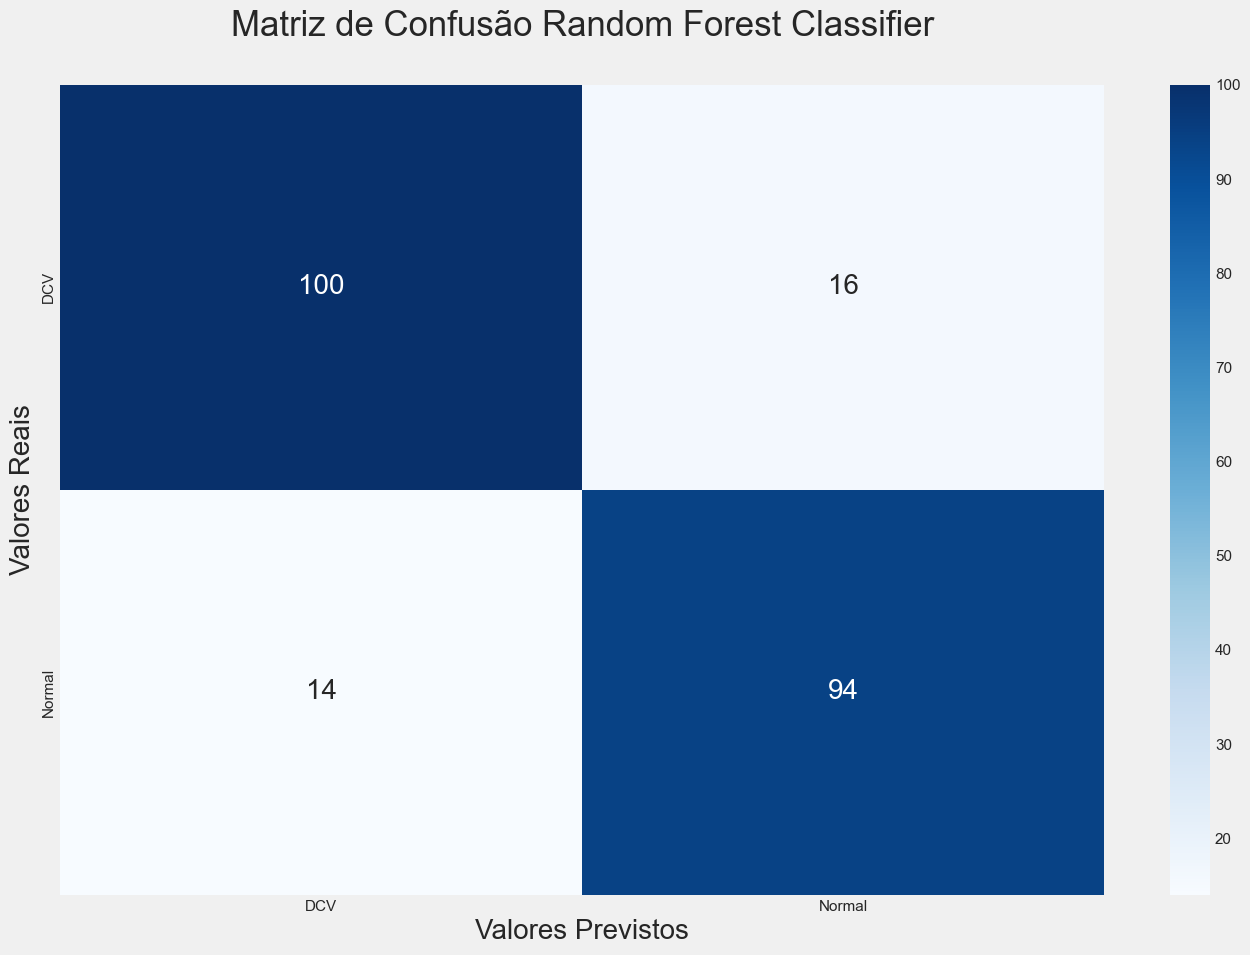

In [66]:
# Mostrar as métricas e a matriz de confusão de Random Forest Classifier
metricas(X_teste, y_teste, rfc, 'Random Forest Classifier')

kNN

Acurácia: 0.638

Precisão: 0.631

Revocação: 0.602

Pontuação F1: 0.616


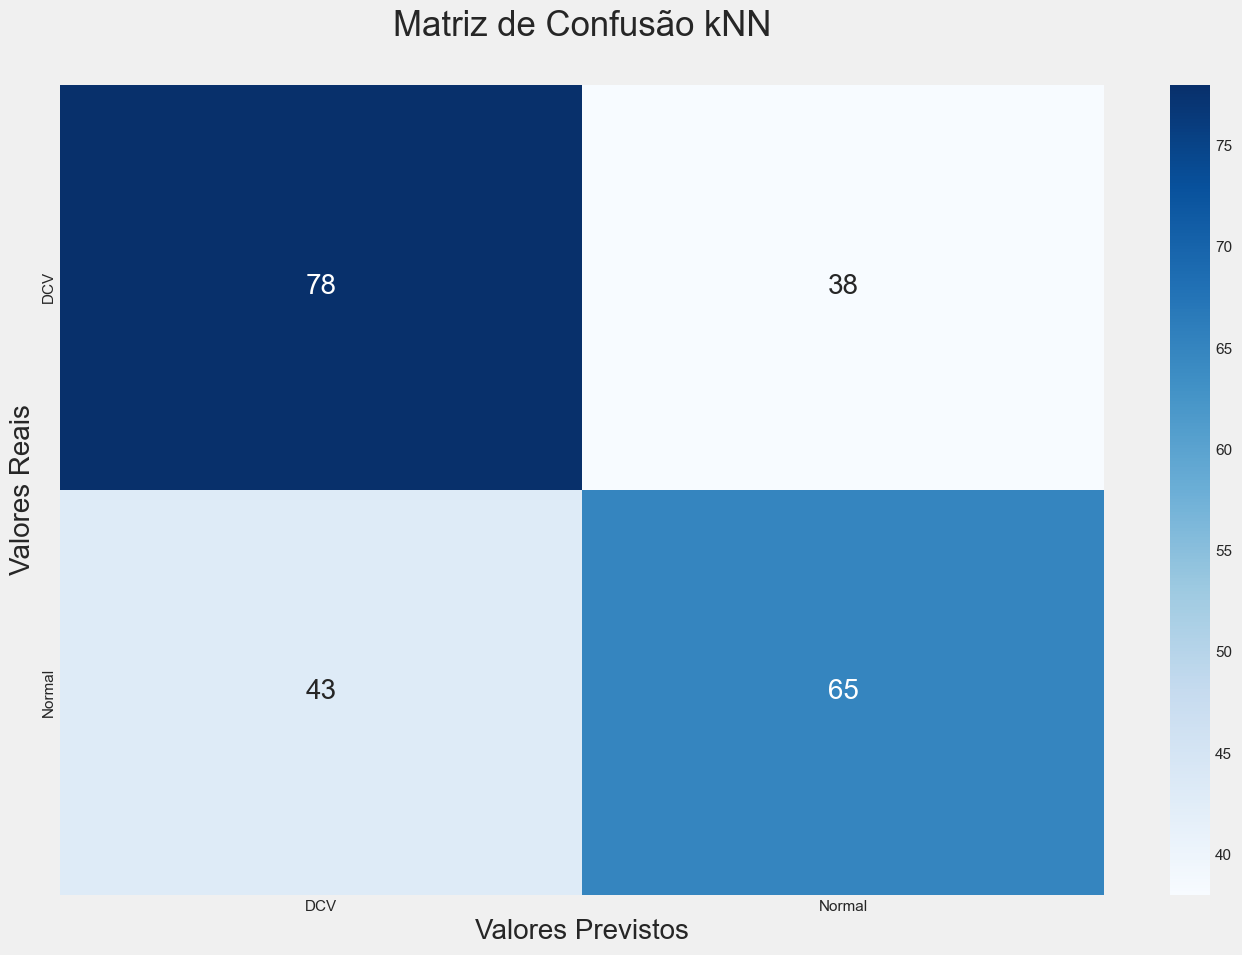

In [67]:
# Mostrar as métricas e a matriz de confusão de kNN
metricas(X_teste, y_teste, knn, 'kNN')

Gradient Boosting Classifier

Acurácia: 0.862

Precisão: 0.847

Revocação: 0.870

Pontuação F1: 0.858


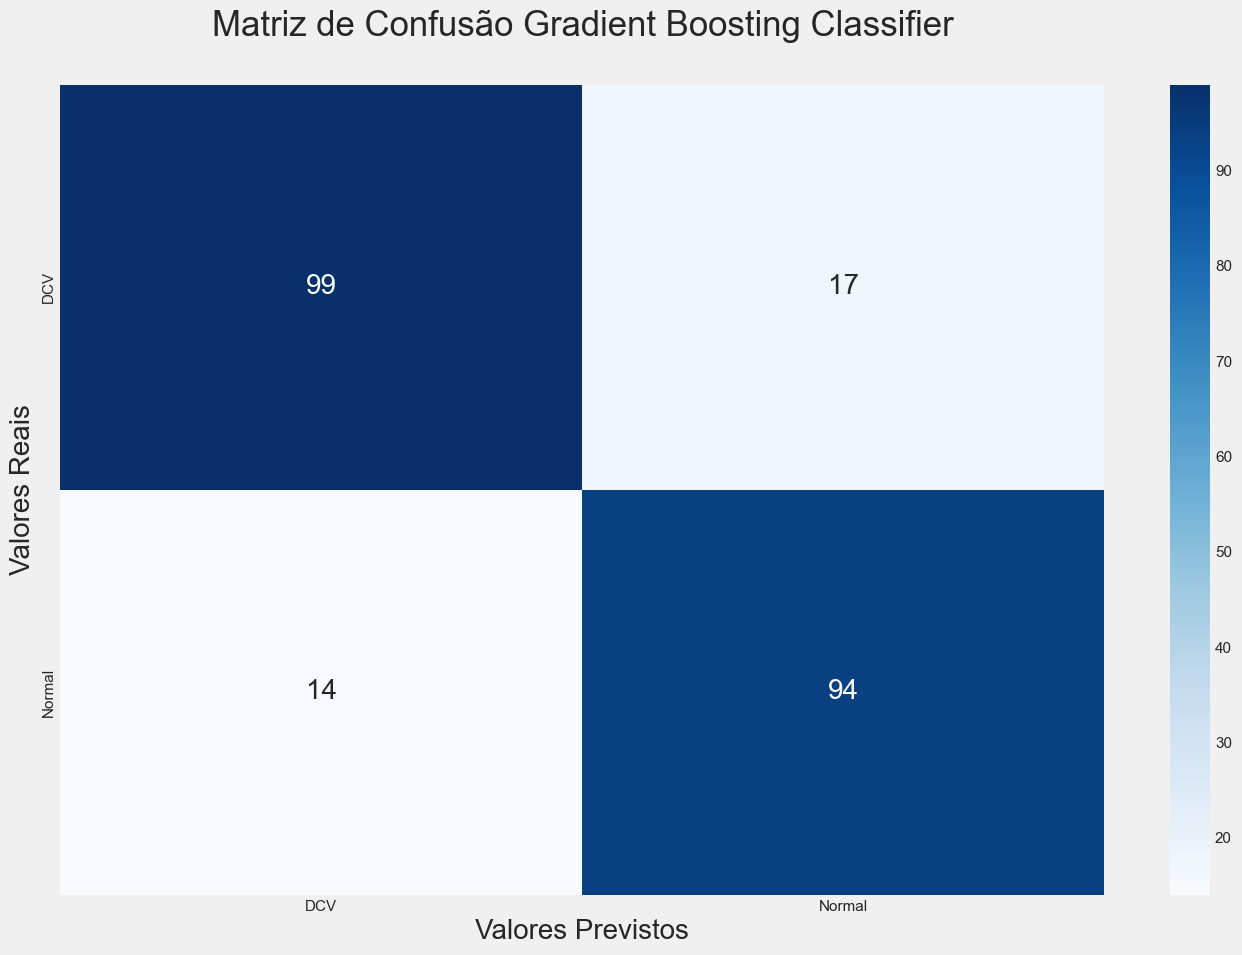

In [68]:
# Mostrar as métricas e a matriz de confusão de Gradient Boosting Classifier
metricas(X_teste, y_teste, gbc, 'Gradient Boosting Classifier')

## 8. Conclusões finais

In [69]:
'''
Dentre os três modelos de Aprendizado de Máquina, o melhor foi o Random Forest Classifier. Vamos analisar as pontuações de suas métricas:

Acurácia: Em 86,6% dos casos o modelo acerta.
Precisão: Em 85,5% dos casos o modelo tem certeza do resultado que entrega.
Revocação: Em 87% dos casos o modelo prevê a classe e realmente é a classe prevista.
Pontuação F1: A precisão e revocação do modelo estão de acordo em 86,2% dos casos.
Um valor de 85,5% de precisão já é um bom começo para um modelo de Inteligência Artificial 
para ajudar as pessoas que possam vir a desenvolver algum tipo de doença cardiovascular, 
uma vez que 85,5% de chances de prever essa enfermidade é melhor do que ficar a deriva somente com os 50%: 
"será que terei alguma doença cardiovascular ou não?".
'''

'\nDentre os três modelos de Aprendizado de Máquina, o melhor foi o Random Forest Classifier. Vamos analisar as pontuações de suas métricas:\n\nAcurácia: Em 86,6% dos casos o modelo acerta.\nPrecisão: Em 85,5% dos casos o modelo tem certeza do resultado que entrega.\nRevocação: Em 87% dos casos o modelo prevê a classe e realmente é a classe prevista.\nPontuação F1: A precisão e revocação do modelo estão de acordo em 86,2% dos casos.\nUm valor de 85,5% de precisão já é um bom começo para um modelo de Inteligência Artificial \npara ajudar as pessoas que possam vir a desenvolver algum tipo de doença cardiovascular, \numa vez que 85,5% de chances de prever essa enfermidade é melhor do que ficar a deriva somente com os 50%: \n"será que terei alguma doença cardiovascular ou não?".\n'